# Scraping Code

In [5]:
# Importing necessary libraries
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.action_chains import ActionChains
import time
from selenium.common.exceptions import NoSuchElementException
import pandas as pd

# Setting up Chrome options and initializing the driver
options = webdriver.ChromeOptions()
options.add_argument('log-level=3')
options.add_argument('--ignore-certificate-errors-spki-list')
options.add_argument('--ignore-ssl-errors')
options.add_argument('--disable-gpu')
s = Service('C:\Program Files (x86)\chromedriver.exe')
driver = webdriver.Chrome(service=s, options=options)
driver.maximize_window()

# Function to check if webpage is completely loaded
def webpagecompleteloaded(driver):
    return driver.execute_script("return document.readyState") == "complete"

# Function to check if element exists by XPath
def check_exists_by_xpath(xpath):
    try:
        driver.find_element(By.XPATH, xpath)
    except NoSuchElementException:
        return False
    return True

# List of CSV file names and corresponding links to scrape
csv_name_list=["15960.csv","12346.csv","05639.csv","13182.csv","02502.csv","02518.csv","12509.csv","12515.csv","12507.csv","22501.csv","12503.csv","22512.csv"]
link_list=["https://etrain.info/train/Kamrup-Express-15960/history?d=1y","https://etrain.info/train/Saraighat-Exp-12346/history?d=1y",
           "https://etrain.info/train/Scl-Koaa-Special-05639/history?d=1y","https://etrain.info/train/Kaziranga-Exp-13182/history?d=1y",
           "https://etrain.info/train/Agtl-Koaa-Spl-02502/history?d=1y","https://etrain.info/train/Ghy-Koaa-Special-02518/history?d=1y",
           "https://etrain.info/train/Guwahati-Exp-12509/history?d=1y","https://etrain.info/train/Cbe-Scl-Exp-12515/history?d=1y",
           "https://etrain.info/train/Aronai-Express-12507/history?d=1y","https://etrain.info/train/New-Tinsukia-Exp-22501/history?d=1y",
           "https://etrain.info/train/Agtl-Humsafar-12503/history?d=1y","https://etrain.info/train/Karmabhoomi-Exp-22512/history?d=1y"]

# Loop through each link and scrape data
for i in range(len(csv_name_list)):
    driver.get(link_list[i]) 

    # Wait until the page is completely loaded
    while not webpagecompleteloaded(driver):
        time.sleep(4)
        print("Waiting for page to load")

    # Wait for the element to be present on the page
    element_np = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.XPATH, '/html/body/div[1]/div[2]/div[2]/div[3]/div[1]/div[2]/table/tbody/tr[4]/td/a[2]/div[1]'))
    )

    # Initialize empty lists to store data
    Station = []
    Station_Name = []
    Average_Delay = []
    Right_Time = []
    Slight_Delay=[]
    Significant_Delay = []
    Cancelled = []

    # Function to check if an element is visible
    def is_element_visible(element):
        return element.is_displayed()

    # Function to scroll to the bottom of the page
    def scroll_to_bottom():
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    # Find the first element to expand
    element_index = 1

    # Loop until there are no more elements to expand
    while True:
        try:
            # Expand the current element
            element_xpath = f'/html/body/div[1]/div[2]/div[2]/div[3]/div[1]/div[2]/table/tbody/tr[4]/td/a[{element_index}]/div[1]'
            element_to_expand = driver.find_element(By.XPATH, element_xpath)
            # Create an instance of ActionChains
            actions = ActionChains(driver)
            time.sleep(1)
            # actions on the expanded element 
            text=driver.find_element(By.XPATH,"/html/body/div[1]/div[2]/div[2]/div[3]/div[1]/div[2]/table/tbody/tr[4]/td/a["+str(element_index)+"]/div[1]")
            print("------------------")
            lis=text.text.split("(")

            Station.append(lis[-1].split(")")[0])
            Station_Name.append(lis[0])

            print("station - " + str(lis[-1].split(")")[0]))
            print("station name - " +str(lis[0]))

            # Expanding the element
            time.sleep(1)
            element_to_expand.click()
            time.sleep(2)

            # Extracting useful data

            delay=driver.find_element(By.XPATH,"/html/body/div[3]/div/div/div[2]")

            avg_delay=delay.text.split()[3].split(":")[-1]

            Average_Delay.append(avg_delay)

            print("avg delay - "+str(avg_delay))

            percent1=driver.find_element(By.XPATH,"/html/body/div[3]/div/div/table/tbody/tr[1]/td[2]")
            percent2=driver.find_element(By.XPATH,"/html/body/div[3]/div/div/table/tbody/tr[2]/td[2]")
            percent3=driver.find_element(By.XPATH,"/html/body/div[3]/div/div/table/tbody/tr[3]/td[2]")
            percent4=driver.find_element(By.XPATH,"/html/body/div[3]/div/div/table/tbody/tr[4]/td[2]")

            Right_Time.append(percent1.text.split("%")[0])
            Slight_Delay.append(percent2.text.split("%")[0])
            Significant_Delay.append(percent3.text.split("%")[0])
            Cancelled.append(percent4.text.split("%")[0])

            print("percent 1 - "+str(percent1.text.split("%")[0]))
            print("percent 2 - "+str(percent2.text.split("%")[0]))
            print("percent 3 - "+str(percent3.text.split("%")[0]))
            print("percent 4  - "+str(percent4.text.split("%")[0]))

            print("----------------------------------------done---------------------------------------------------------")

            # Scroll down to load more elements if necessary
            scroll_to_bottom()
            
            # Increment the index to find the next element
            element_index += 1
            element_xpath = f'/html/body/div[3]/div/a/i'
            element_to_expand = driver.find_element(By.XPATH, element_xpath)

            # Collapse the expanded element
            actions.move_to_element(element_to_expand).click().perform()
        except NoSuchElementException:
            # If NoSuchElementException occurs, it means there are no more elements to expand
            break
        
    # loading the extracted data into csv through pandas dataframe. 
    train_df = pd.DataFrame(list(zip(Station,Station_Name,Average_Delay,Right_Time,Slight_Delay,Significant_Delay,Cancelled)),columns=["Station","Station_Name","Average_Delay(min)","Right Time (0-15 min's)","Slight Delay (15-60 min's)","Significant Delay (>1 Hour)","Cancelled/Unknown"])
    train_df.to_csv(csv_name_list[i], index=False)


------------------
station - DBRG
station name - DIBRUGARH 
avg delay - 9
percent 1 - 95.79
percent 2 - 1.53
percent 3 - 2.68
percent 4  - 0.00
----------------------------------------done---------------------------------------------------------
------------------
station - NTSK
station name - NEW TINSUKIA JN 
avg delay - 12
percent 1 - 81.99
percent 2 - 15.33
percent 3 - 2.68
percent 4  - 0.00
----------------------------------------done---------------------------------------------------------
------------------
station - DJG
station name - DULIAJAN 
avg delay - 18
percent 1 - 68.20
percent 2 - 28.35
percent 3 - 3.45
percent 4  - 0.00
----------------------------------------done---------------------------------------------------------
------------------
station - NHK
station name - NAHARKATIYA 
avg delay - 30
percent 1 - 32.57
percent 2 - 62.84
percent 3 - 4.60
percent 4  - 0.00
----------------------------------------done---------------------------------------------------------
-----

KeyboardInterrupt: 

## Visualization

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objects as go
import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")


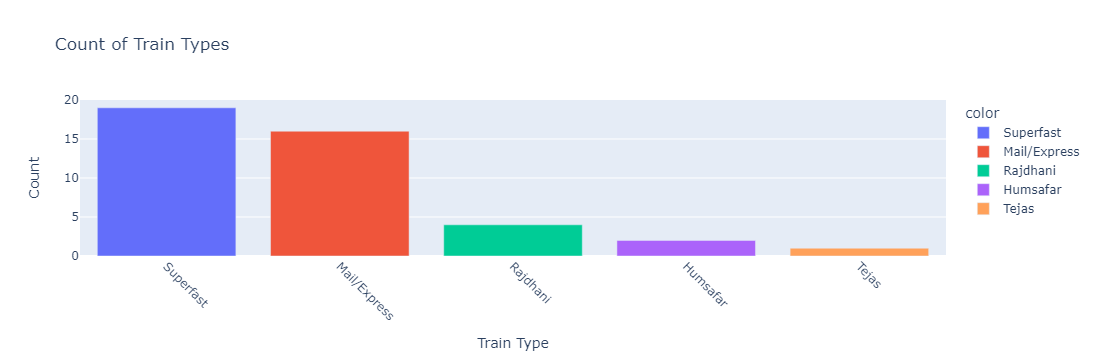

In [22]:
# Load Train_List.csv into a DataFrame
train_list_df = pd.read_csv("Train_List.csv")



# Plot the count of train types using Plotly
fig = px.bar(train_list_df['Type'].value_counts(), x=train_list_df['Type'].value_counts().index, 
             y=train_list_df['Type'].value_counts().values, color=train_list_df['Type'].value_counts().index,
             labels={'y': 'Count', 'x': 'Train Type'}, title='Count of Train Types')
fig.update_xaxes(tickangle=45)
fig.show()



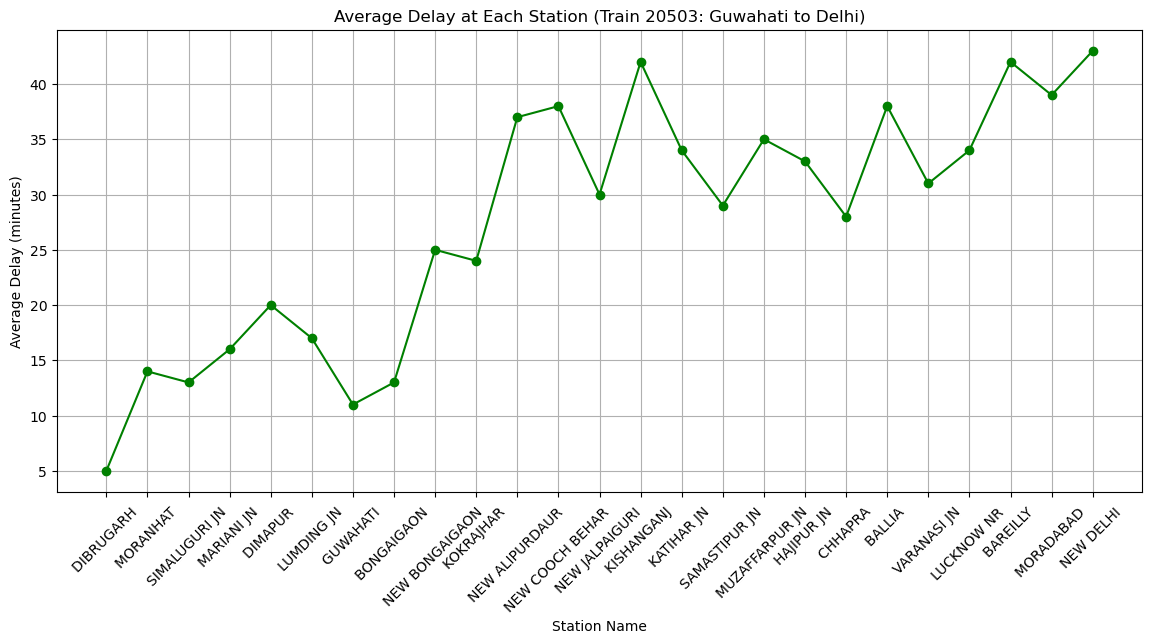

In [23]:
# Load train route information for a train running between Guwahati and Delhi
train_route_df = pd.read_csv("Train_Route/20503.csv")  # Using the file corresponding to train number 20503 (DBRG NDLS RAJEXP)

# Plot the average delay at each station
plt.figure(figsize=(14, 6))
plt.plot(train_route_df['Station_Name'], train_route_df['Average_Delay(min)'], marker='o', color='green')
plt.title('Average Delay at Each Station (Train 20503: Guwahati to Delhi)')
plt.xlabel('Station Name')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [27]:
# Function to load route data for a given train number
def load_route_data(train_number):
    file_name = f"Train_Route/{train_number}.csv"
    return pd.read_csv(file_name)

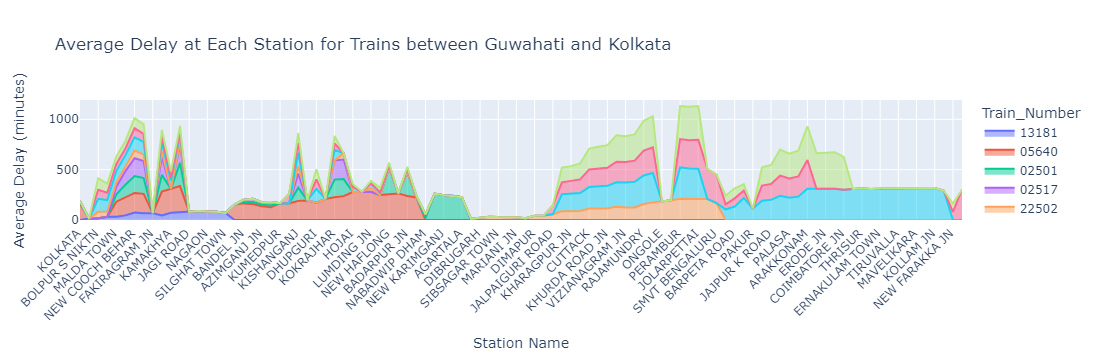

In [28]:
# List of train numbers running between Guwahati and Kolkata
train_numbers_kolkata = ["13181", "05640", "02501", "02517", "22502", "12508", "12510", "12516"]

# Create a DataFrame to store combined route data
combined_data_kolkata = pd.DataFrame()

# Load route data for each train and append to the combined DataFrame
for train_number in train_numbers_kolkata:
    route_data = load_route_data(train_number)
    route_data['Train_Number'] = train_number  # Add train number as a column
    combined_data_kolkata = pd.concat([combined_data_kolkata, route_data])  # Concatenate route data

# Plot the average delay at each station for all trains combined using plotly
fig_kolkata = px.area(combined_data_kolkata, x='Station_Name', y='Average_Delay(min)', color='Train_Number',
                      title='Average Delay at Each Station for Trains between Guwahati and Kolkata')
fig_kolkata.update_layout(xaxis_title='Station Name', yaxis_title='Average Delay (minutes)', xaxis_tickangle=-45)
fig_kolkata.show()

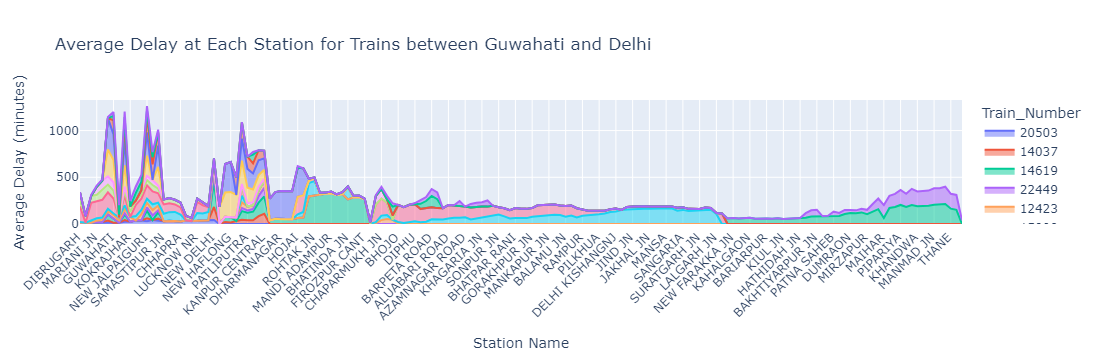

In [29]:
# List of train numbers running between Guwahati and Delhi
train_numbers = ["20503", "14037", "14619", "22449", "12423", "15909", "15910", "20504", "12424", "14038", "14620", "22450", "15648", "15946"]

# Create a DataFrame to store combined route data
combined_data = pd.DataFrame()

# Load route data for each train and append to the combined DataFrame
for train_number in train_numbers:
    route_data = load_route_data(train_number)
    route_data['Train_Number'] = train_number  # Add train number as a column
    combined_data = pd.concat([combined_data, route_data])  # Concatenate route data

# Plot the average delay at each station for all trains combined using an area plot
delhi = px.area(combined_data, x='Station_Name', y='Average_Delay(min)', color='Train_Number',
              title='Average Delay at Each Station for Trains between Guwahati and Delhi')
delhi.update_layout(xaxis_title='Station Name', yaxis_title='Average Delay (minutes)', xaxis_tickangle=-45)
delhi.show()

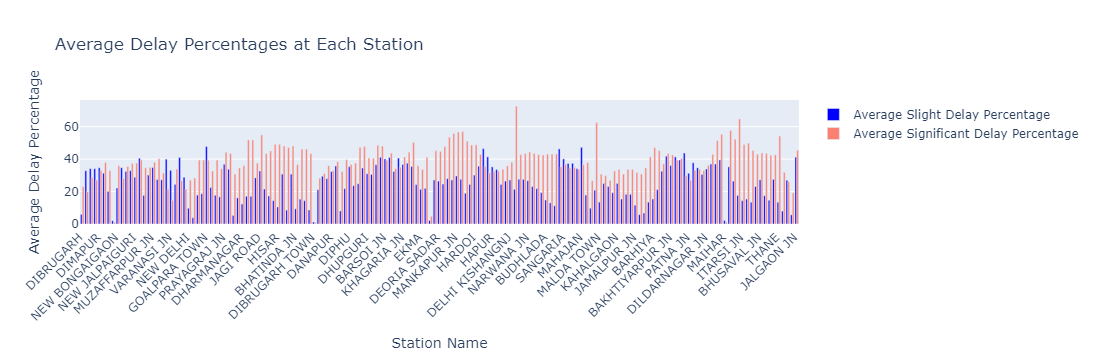

In [42]:
# Load the route data for each train and calculate delay percentages
def calculate_delay_percentages(train_number):
    # Load route data for the given train number
    route_data = pd.read_csv(f"Train_Route/{train_number}.csv")
    
    # Calculate delay percentages
    route_data['Slight_Delay_Percentage'] = route_data['Slight Delay (15-60 min\'s)'].astype(float)
    route_data['Significant_Delay_Percentage'] = route_data['Significant Delay (>1 Hour)'].astype(float)
    
    return route_data

# List of train numbers running between Guwahati and Delhi
train_numbers = ["20503", "14037", "14619", "22449", "12423", "15909", "15910",
                 "20504", "12424", "14038", "14620", "22450", "15648", "15946",
                 "12520", "12519", "15647", "15945"]

# Dictionary to store delay percentages at each station
delay_percentages = {}

# Calculate delay percentages for each train and station
for train_number in train_numbers:
    route_data = calculate_delay_percentages(train_number)
    for index, row in route_data.iterrows():
        station_name = row['Station_Name']
        if station_name not in delay_percentages:
            delay_percentages[station_name] = {'Slight_Delay_Percentage': [], 'Significant_Delay_Percentage': []}
        delay_percentages[station_name]['Slight_Delay_Percentage'].append(row['Slight_Delay_Percentage'])
        delay_percentages[station_name]['Significant_Delay_Percentage'].append(row['Significant_Delay_Percentage'])

# Calculate average slight delay percentages at each station
average_slight_delay_percentages = {}
for station, percentages in delay_percentages.items():
    avg_slight_delay_percentage = sum(percentages['Slight_Delay_Percentage']) / len(percentages['Slight_Delay_Percentage'])
    average_slight_delay_percentages[station] = avg_slight_delay_percentage

# Calculate average significant delay percentages at each station
average_significant_delay_percentages = {}
for station, percentages in delay_percentages.items():
    avg_significant_delay_percentage = sum(percentages['Significant_Delay_Percentage']) / len(percentages['Significant_Delay_Percentage'])
    average_significant_delay_percentages[station] = avg_significant_delay_percentage

# Plotting using Plotly
fig = go.Figure()

fig.add_trace(go.Bar(x=list(average_slight_delay_percentages.keys()), 
                     y=list(average_slight_delay_percentages.values()), 
                     name='Average Slight Delay Percentage',
                     marker_color='blue'))

fig.add_trace(go.Bar(x=list(average_significant_delay_percentages.keys()), 
                     y=list(average_significant_delay_percentages.values()), 
                     name='Average Significant Delay Percentage',
                     marker_color='salmon'))

fig.update_layout(title='Average Delay Percentages at Each Station',
                  xaxis_title='Station Name',
                  yaxis_title='Average Delay Percentage',
                  barmode='group',
                  xaxis_tickangle=-45)

fig.show()
